In [1]:
import numpy as np
import xarray as xr
import swiftest
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
swiftersim = swiftest.Simulation(param_file=inparfile, codename="Swifter")
swiftersim.bin2xr()
swifterdat = swiftersim.ds

Reading Swifter file param.swifter.in
Reading in time 3.630e+02
Creating Dataset
Successfully converted 34 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
inparfile = 'param.swiftest.in'
swiftestsim = swiftest.Simulation(param_file=inparfile)
swiftestsim.bin2xr()
swiftestdat = swiftestsim.ds

Reading Swiftest file param.swiftest.in
Reading in time 3.630e+02
Creating Dataset
Successfully converted 34 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestdat - swifterdat

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (d)'})

In [6]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

In [7]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 10]
tpidx = swiftdiff.id.values[swiftdiff.id.values > 10]

In [8]:
swiftdiff.id

<xarray.DataArray 'id' (id: 24)>
array([  1,   2,   3,   4,   5,   6,   7,   8, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116])
Coordinates:
  * id       (id) int64 1 2 3 4 5 6 7 8 101 ... 109 110 111 112 113 114 115 116

In [9]:
swiftdiff['px'].sel(id=4)

<xarray.DataArray 'px' (time (d): 34)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
    id        int64 4
  * time (d)  (time (d)) float64 0.0 11.0 22.0 33.0 ... 330.0 341.0 352.0 363.0

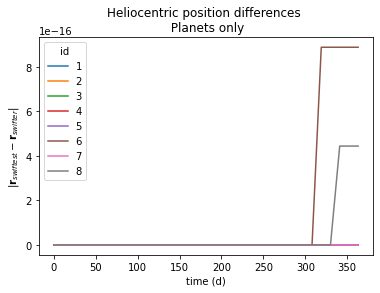

In [10]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-mars_ejecta-planets-rmag.png", facecolor='white', transparent=False, dpi=300)

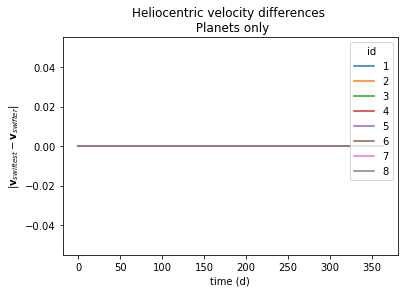

In [11]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-mars_ejecta-planets-vmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


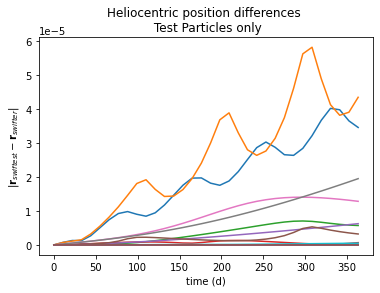

In [12]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-mars_ejecta-testparticles-rmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


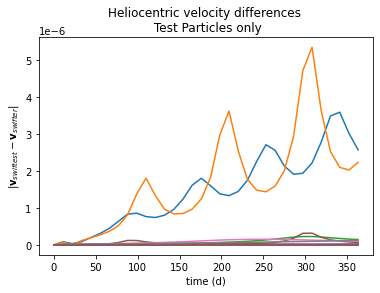

In [13]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-mars_ejecta-testparticles-vmag.png", facecolor='white', transparent=False, dpi=300)